In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('Train_Set.csv')
test=pd.read_csv('Test_Set.csv')

In [3]:
train.shape,test.shape

((126363, 28), (54156, 27))

In [4]:
train.head().T

,0,1,2,3,4
OrderId,2477882,2477895,2473260,2466916,2351480
Customer_Id,12386,2630,1752,9268,2888
Customer_Category,Consumer,Consumer,Corporate,Consumer,Corporate
Cust_State,AR,BR,RJ,UP,UP
Zipcode,19120,2907,90214,745,92427
Sales,150.0,165.0,171.0,132.0,NaN
Order_zone,Central,East,South,East,North
Price,4383.39,4295.72,3616.65,9175.86,2779.29
CategoryName,Cat-2,Cat-2,Cat-50,Cat-12,Cat-3
Transcation,UPI,UPI,Cash,Credit,UPI


In [5]:
test.head().T

,0,1,2,3,4
OrderId,2372881,2445349,2441537,2461867,2461659
Customer_Id,2989,5359,4111,5377,10563
Customer_Category,others,Consumer,Corporate,Consumer,Consumer
Cust_State,HR,MA,GJ,RJ,WB
Zipcode,735,737,91350,77860,47922
Sales,NaN,222.0,149.0,162.0,115.0
Order_zone,West,Central,East,North,North
Price,2833.08,14133.42,3545.31,9234.05,9174.76
CategoryName,Cat-3,Cat-49,Cat-50,Cat-12,Cat-12
Transcation,UPI,Debit,Credit,UPI,UPI


#### EDA

In [6]:
len(train.Customer_Id.unique())

16707

In [7]:
len(train.OrderId.unique())

126363

Consumer     65464
Corporate    38360
others       22539
Name: Customer_Category, dtype: int64


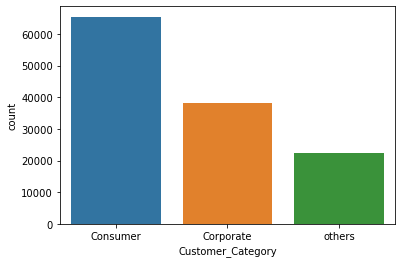

In [8]:
print(train['Customer_Category'].value_counts())
sns.countplot(train['Customer_Category'])

AR     7105
RJ     7104
MP     7077
JK     7072
AP     7065
PB     7046
MA     7041
HP     7032
HR     7027
OR     7023
BR     7020
TEL    7000
KL     6980
GJ     6979
UP     6978
KA     6974
WB     6945
UK     6895
Name: Cust_State, dtype: int64


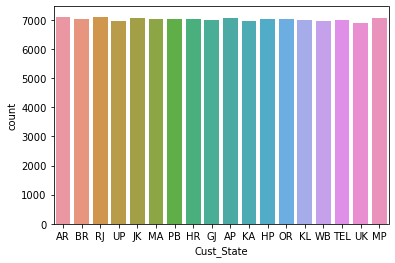

In [9]:
print(train['Cust_State'].value_counts())
sns.countplot(train['Cust_State'])

In [10]:
v=train['Zipcode'].value_counts()
v[v>102]

745    4335
744    4325
735    4321
742    4318
738    4271
743    4247
736    4228
740    4213
741    4166
737    4160
739    4119
Name: Zipcode, dtype: int64

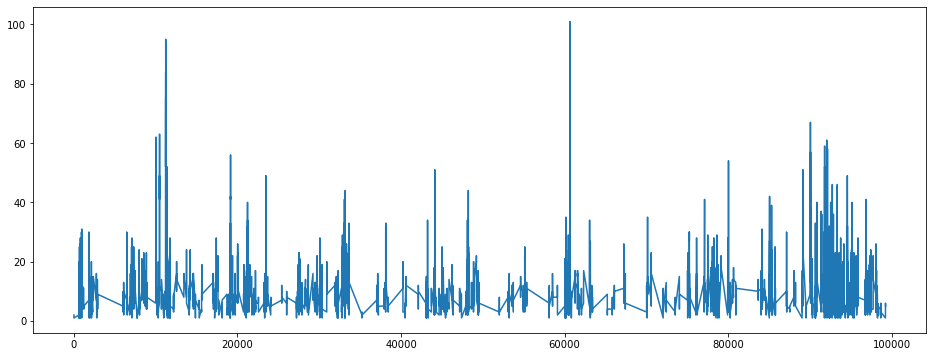

In [11]:
plt.figure(figsize=(16,6))
sns.lineplot(v[v<102].index,v[v<102].values)

North      25375
South      25327
East       25257
Central    25230
West       25174
Name: Order_zone, dtype: int64


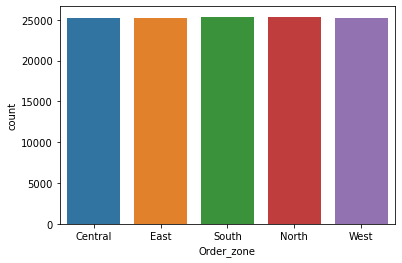

In [12]:
print(train['Order_zone'].value_counts())
sns.countplot(train['Order_zone'])

Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22      358
Cat-36      345
Cat-38      336
Cat-34      335
Cat-45      317
Cat-10      311
Cat-40      309
Cat-16      305
Cat-6       304
Cat-14      304
Cat-33      272
Cat-1       265
Cat-9       262
Cat-39      243
Cat-30      230
Cat-24      222
Cat-47      202
Cat-25      202
Cat-35      202
Cat-23      152
Cat-31      137
Cat-46      124
Cat-18       92
Cat-28       82
Cat-17       51
Cat-43       41
Cat-26       40
Name: CategoryName, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

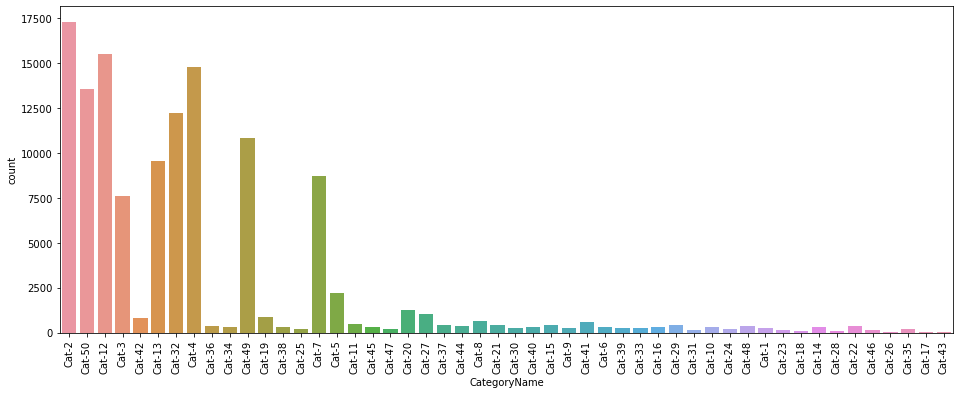

In [13]:
print(train['CategoryName'].value_counts())
plt.figure(figsize=(16,6))

sns.countplot(train['CategoryName'])
plt.xticks(rotation='vertical')

Debit     48586
UPI       34947
Credit    29113
Cash      13717
Name: Transcation, dtype: int64


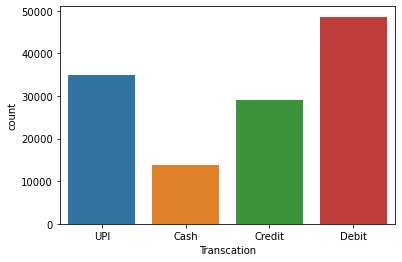

In [14]:
print(train['Transcation'].value_counts())
sns.countplot(train['Transcation'])

7     46834
4     34328
5     23209
3     10142
6      6794
2      1736
9      1455
10     1014
11      336
8       272
12      243
Name: Dept_Id, dtype: int64


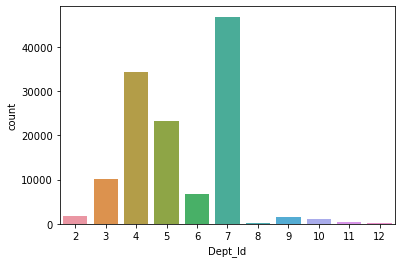

In [15]:
print(train['Dept_Id'].value_counts())
sns.countplot(train['Dept_Id'])

Fan Shop              46834
Apparel               34328
Golf                  23209
Footwear              10142
Outdoors               6794
Fitness                1736
Discs Shop             1455
Technology             1014
Pet Shop                336
Book Shop               272
Health and Beauty       243
Name: Dept_Name, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

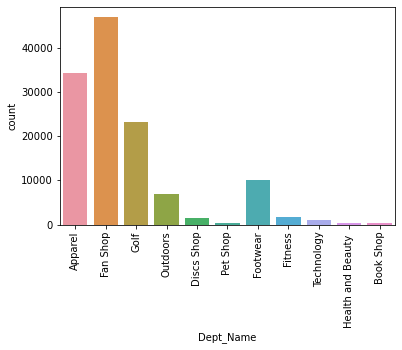

In [16]:
print(train['Dept_Name'].value_counts())
sns.countplot(train['Dept_Name'])
plt.xticks(rotation='vertical')

Not Fragile    71204
Fragile        55159
Name: Product_type, dtype: int64


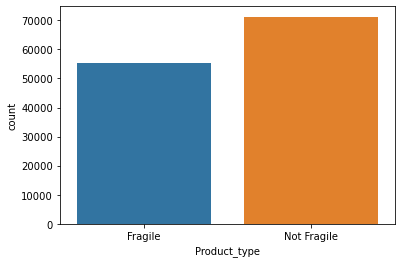

In [17]:
print(train['Product_type'].value_counts())
sns.countplot(train['Product_type'])

17    17297
18    15489
24    14762
46    13551
45    12223
48    10810
43     9564
9      8735
29     7593
37     1424
40     1232
36     1016
26      854
35      799
13      779
41      667
75      609
3       458
76      448
63      447
7       418
62      405
74      375
33      365
66      358
68      345
72      336
67      335
32      317
44      311
71      309
64      305
65      304
12      304
59      272
73      265
38      262
69      243
5       230
6       222
61      202
11      202
30      202
70      152
60      137
31      124
2        92
10       82
4        51
34       41
16       40
Name: Prod_Category_Id, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

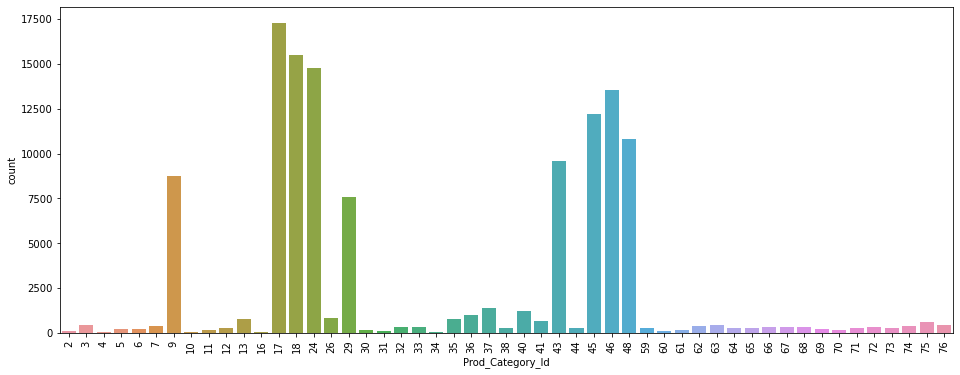

In [18]:
print(train['Prod_Category_Id'].value_counts())
plt.figure(figsize=(16,6))

sns.countplot(train['Prod_Category_Id'])
plt.xticks(rotation='vertical')

0    76543
1    49820
Name: Dispatched, dtype: int64


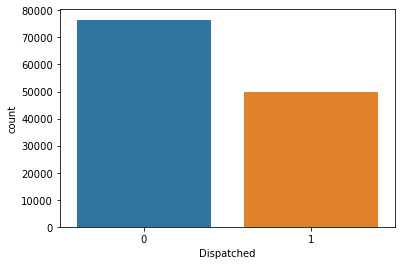

In [19]:
print(train['Dispatched'].value_counts())
sns.countplot(train['Dispatched'])

Standard    75433
2A          24682
1A          19427
Elite        6821
Name: Shipping_Class, dtype: int64


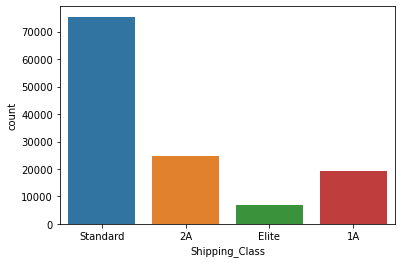

In [20]:
print(train['Shipping_Class'].value_counts())
sns.countplot(train['Shipping_Class'])

NORTH      36043
CENTRAL    35194
SOUTH      28863
WEST       18102
NE          8161
Name: Warehouse_Region, dtype: int64


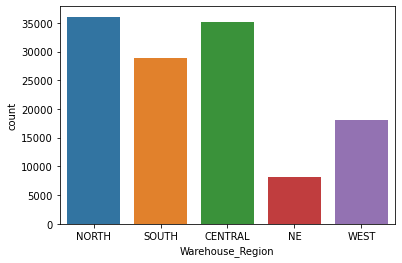

In [21]:
print(train['Warehouse_Region'].value_counts())
sns.countplot(train['Warehouse_Region'])

0    63444
1    62919
Name: WeekdayOrder, dtype: int64


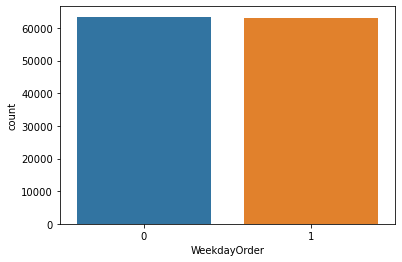

In [22]:
print(train['WeekdayOrder'].value_counts())
sns.countplot(train['WeekdayOrder'])

0    84912
1    41451
Name: Delivery_Status, dtype: int64


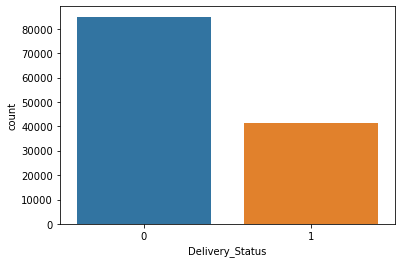

In [23]:
print(train['Delivery_Status'].value_counts())
sns.countplot(train['Delivery_Status'])

4.0    42860
3.0    41201
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64


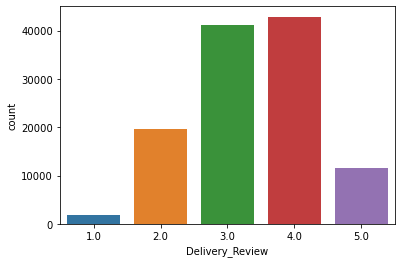

In [24]:
print(train['Delivery_Review'].value_counts())
sns.countplot(train['Delivery_Review'])

2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64


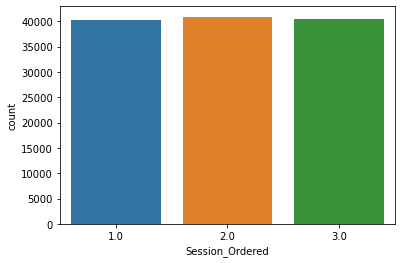

In [25]:
print(train['Session_Ordered'].value_counts())
sns.countplot(train['Session_Ordered'])

4    30256
2    27604
3    25045
6    20138
5    19757
0     3563
Name: Scheduled_Shipping, dtype: int64


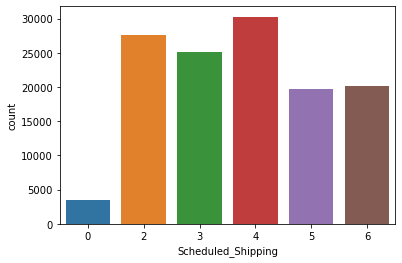

In [26]:
print(train['Scheduled_Shipping'].value_counts())
sns.countplot(train['Scheduled_Shipping'])

In [27]:
num=train[['Sales','Price','Profit_Ratio','Order_Profit ','Discount','Quantity','ProductLength','ProductWeight']].copy(deep=True)

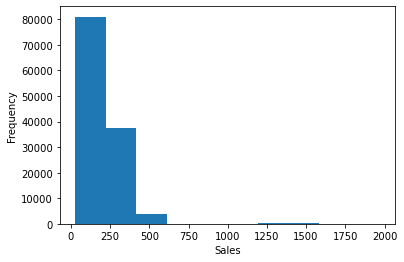

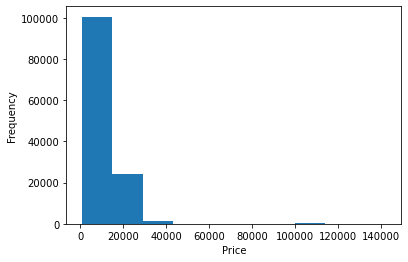

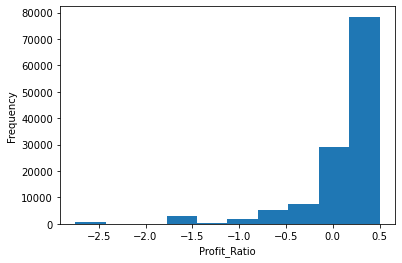

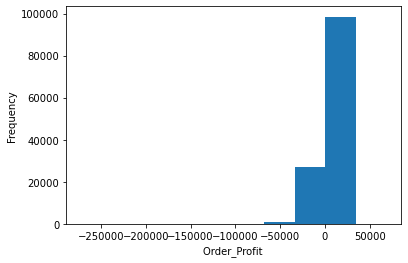

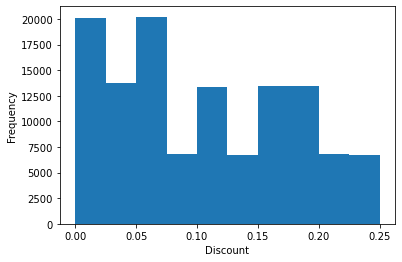

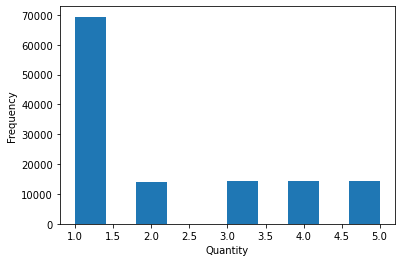

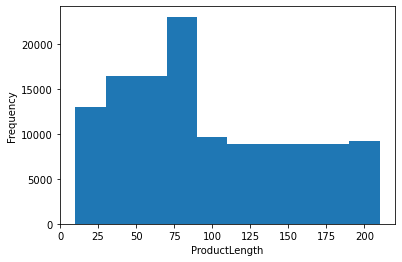

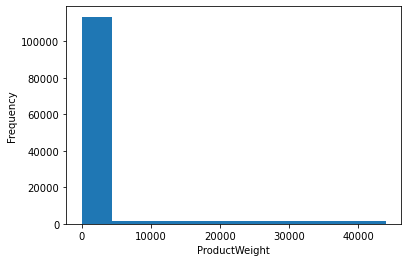

In [28]:
for i in num:
    plt.xlabel(i)
    num[i].plot(kind='hist')
    plt.show()

In [29]:
train.columns

Index(['OrderId', 'Customer_Id', 'Customer_Category', 'Cust_State', 'Zipcode',
       'Sales', 'Order_zone', 'Price', 'CategoryName', 'Transcation',
       'Dept_Id', 'Dept_Name', 'Profit_Ratio', 'Discount', 'Quantity',
       'Order_Profit ', 'Product_type', 'Prod_Category_Id', 'ProductLength',
       'ProductWeight', 'Dispatched', 'Shipping_Class', 'Scheduled_Shipping',
       'Warehouse_Region', 'Delivery_Review', 'Session_Ordered',
       'WeekdayOrder', 'Delivery_Status'],
      dtype='object')

In [30]:
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
OrderId,126363.0,NaN,NaN,NaN,2431879.920325,52125.241745,2341525.0,2386691.5,2432005.0,2477044.5,2522043.0
Customer_Id,126363.0,NaN,NaN,NaN,6808.571552,4164.592992,103.0,3375.0,6582.0,9888.0,20874.0
Customer_Category,126363,3,Consumer,65464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cust_State,126363,18,AR,7105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zipcode,126363.0,NaN,NaN,NaN,35961.067029,37550.046447,12.0,742.0,19168.0,78219.0,99225.0
Sales,122749.0,NaN,NaN,NaN,196.119952,121.4487,28.0,113.0,173.0,261.0,1969.0
Order_zone,126363,5,North,25375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,126363.0,NaN,NaN,NaN,10064.758724,9923.788862,617.31,3587.76,4415.28,14222.4,142151.34
CategoryName,126363,50,Cat-2,17297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transcation,126363,4,Debit,48586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Null

In [31]:
test.isna().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 1460
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              2174
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

In [32]:
train.isna().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 3614
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

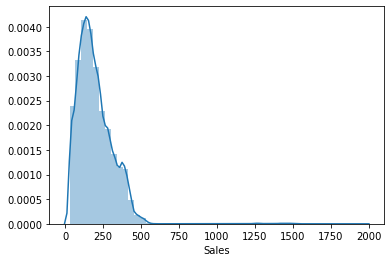

In [33]:
sns.distplot(train['Sales'])

In [34]:
train['Sales'].median(),train['Sales'].mean()

(173.0, 196.11995209736943)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

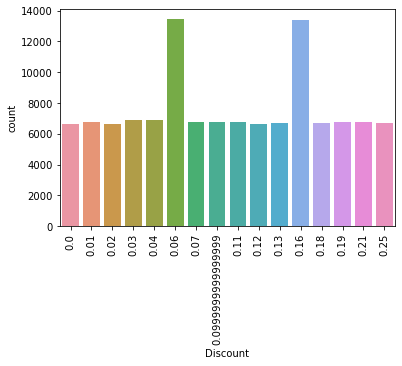

In [35]:
sns.countplot(train['Discount'])
plt.xticks(rotation='vertical')

In [36]:
train['Discount'].median()

0.0999999999999999

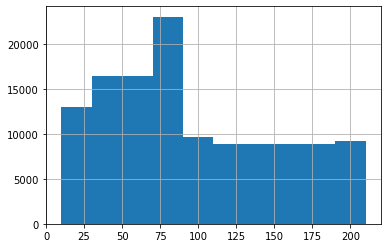

In [37]:
train['ProductLength'].hist()

In [38]:
train['ProductLength'].median(),train['ProductLength'].mean()

(84.0, 95.97617832227327)

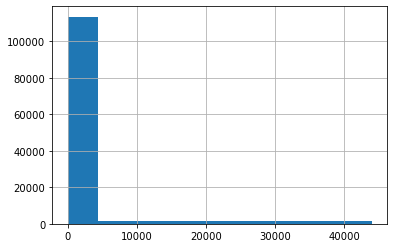

In [39]:
train['ProductWeight'].hist()

In [40]:
train['ProductWeight'].median(),train['ProductLength'].mean()

(1640.0, 95.97617832227327)

(113462,)


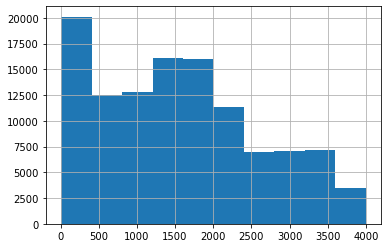

In [41]:
print(train[train['ProductWeight']<4000]['ProductWeight'].shape)
train[train['ProductWeight']<4000]['ProductWeight'].hist()

In [42]:
train[train['ProductWeight']<4000]['ProductWeight'].mean(),train[train['ProductWeight']<4000]['ProductWeight'].median()

(1565.1498563395674, 1489.0)

In [43]:
train['Delivery_Review'].value_counts()

4.0    42860
3.0    41201
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64

In [44]:
train['Delivery_Review'].median()

3.0

In [45]:
print(train['Session_Ordered'].mean(),train['Session_Ordered'].median())
train['Session_Ordered'].value_counts()

2.00149706755723 2.0


2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64

In [46]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='median',missing_values=np.nan)

In [47]:
SI.fit(train[['Session_Ordered']])
train['Session_Ordered']=SI.transform(train[['Session_Ordered']])
test['Session_Ordered']=SI.transform(test[['Session_Ordered']])

In [48]:
SI.fit(train[['Delivery_Review']])
train['Delivery_Review']=SI.transform(train[['Delivery_Review']])
test['Delivery_Review']=SI.transform(test[['Delivery_Review']])

In [49]:
SI.fit(train[['ProductWeight']])
train['ProductWeight']=SI.transform(train[['ProductWeight']])
test['ProductWeight']=SI.transform(test[['ProductWeight']])

In [50]:
SI=SimpleImputer(strategy='mean',missing_values=np.nan)
SI.fit(train[['ProductLength']])
train['ProductLength']=SI.transform(train[['ProductLength']])
test['ProductLength']=SI.transform(test[['ProductLength']])

In [51]:
SI.fit(train[['Sales']])
train['Sales']=SI.transform(train[['Sales']])
test['Sales']=SI.transform(test[['Sales']])

In [52]:
SI=SimpleImputer(strategy='median',missing_values=np.nan)
SI.fit(train[['Discount']])
train['Discount']=SI.transform(train[['Discount']])
test['Discount']=SI.transform(test[['Discount']])

In [53]:
train.isna().sum()

OrderId               0
Customer_Id           0
Customer_Category     0
Cust_State            0
Zipcode               0
Sales                 0
Order_zone            0
Price                 0
CategoryName          0
Transcation           0
Dept_Id               0
Dept_Name             0
Profit_Ratio          0
Discount              0
Quantity              0
Order_Profit          0
Product_type          0
Prod_Category_Id      0
ProductLength         0
ProductWeight         0
Dispatched            0
Shipping_Class        0
Scheduled_Shipping    0
Warehouse_Region      0
Delivery_Review       0
Session_Ordered       0
WeekdayOrder          0
Delivery_Status       0
dtype: int64

#### Outlier & Scaling

In [54]:
num=train[['Sales','Price','Profit_Ratio','Order_Profit ','Discount','Quantity','ProductLength','ProductWeight']].copy(deep=True)

In [55]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'Discount',
       'Quantity', 'ProductLength', 'ProductWeight'],
      dtype='object')

In [56]:
num.skew()

Sales            2.781329
Price            3.171663
Profit_Ratio    -2.870356
Order_Profit    -4.946131
Discount         0.295360
Quantity         0.877450
ProductLength    0.440677
ProductWeight    3.575051
dtype: float64

In [57]:
np.log(num).skew()

Sales           -0.548980
Price            0.321208
Profit_Ratio          NaN
Order_Profit    -1.316721
Discount              NaN
Quantity         0.537578
ProductLength   -0.718180
ProductWeight    0.113135
dtype: float64

In [58]:
np.cbrt(num).skew()

Sales            0.122948
Price            0.825265
Profit_Ratio    -1.608958
Order_Profit    -1.399795
Discount        -1.157660
Quantity         0.638536
ProductLength   -0.248847
ProductWeight    1.883932
dtype: float64

In [59]:
np.sqrt(num).skew()

Sales            0.538543
Price            1.138023
Profit_Ratio    -0.962066
Order_Profit     1.166158
Discount        -0.517250
Quantity         0.694328
ProductLength   -0.048042
ProductWeight    2.524735
dtype: float64

In [60]:
num['Order_Profit ']=np.cbrt(num['Order_Profit '])

In [61]:
num[['Sales','Profit_Ratio']]=np.cbrt(num[['Sales','Profit_Ratio']])
num[['Price','ProductWeight','Quantity']]=np.log(num[['Price','ProductWeight','Quantity']])
num[['ProductLength']]=np.sqrt(num[['ProductLength']])

In [62]:
test_num=test[num.columns].copy(deep=True)
test_num[['Order_Profit ','Profit_Ratio']]=np.cbrt(test_num[['Order_Profit ','Profit_Ratio']])
test_num[['Sales']]=np.cbrt(test_num[['Sales']])
test_num[['Price','ProductWeight','Quantity']]=np.log(test_num[['Price','ProductWeight','Quantity']])
test_num[['ProductLength']]=np.sqrt(test_num[['ProductLength']])

#### CAT NUMERIC Transform

In [63]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'Discount',
       'Quantity', 'ProductLength', 'ProductWeight'],
      dtype='object')

In [64]:
cat=train.drop(num.columns,axis=1)
cat=cat.drop(['OrderId','Delivery_Status'],axis=1)
cat.head()

,Customer_Id,Customer_Category,Cust_State,Zipcode,Order_zone,CategoryName,Transcation,Dept_Id,Dept_Name,Product_type,Prod_Category_Id,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,12386,Consumer,AR,19120,Central,Cat-2,UPI,4,Apparel,Fragile,17,0,Standard,4,NORTH,5.0,2.0,0
1,2630,Consumer,BR,2907,East,Cat-2,UPI,4,Apparel,Fragile,17,0,Standard,6,NORTH,2.0,2.0,1
2,1752,Corporate,RJ,90214,South,Cat-50,Cash,7,Fan Shop,Not Fragile,46,0,Standard,6,SOUTH,4.0,2.0,0
3,9268,Consumer,UP,745,East,Cat-12,Credit,4,Apparel,Not Fragile,18,1,2A,4,NORTH,4.0,3.0,1
4,2888,Corporate,UP,92427,North,Cat-3,UPI,5,Golf,Not Fragile,29,1,Standard,5,CENTRAL,2.0,1.0,0


In [65]:
test_cat=test.drop(test_num.columns,axis=1)
test_cat=test_cat.drop(['OrderId'],axis=1)
#test_cat.head()

In [66]:
y=train['Delivery_Status']

## 1---------------------------------------------------------------------------------------------------

In [67]:
z=pd.DataFrame(train['Customer_Id'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in cat['Customer_Id']:
    m=z.loc[i]['Customer_Id']
    if m<=5:
        new.append('LowValueCustomer')
    elif m>5 and m<10:
        new.append('MediumValueCustomer')
    elif m<15 and m>=10:
        new.append('HighValueCustomer')
    else:
        new.append('VeryHighValueCustomer')

In [68]:
cat['Customer_Id']=new


In [69]:
new=[]
for i in test_cat['Customer_Id']:
    if i in z.index:
        m=z.loc[i]['Customer_Id']
        if m<=5:
            new.append('LowValueCustomer')
        elif m>5 and m<10:
            new.append('MediumValueCustomer')
        elif m<15 and m>=10:
            new.append('HighValueCustomer')
        else:
            new.append('VeryHighValueCustomer')
    else:
        new.append('LowValueCustomer')

In [70]:

test_cat['Customer_Id']=new


## 2----------------------------------------------------------------------

In [71]:
z=pd.DataFrame(train['Zipcode'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in cat['Zipcode']:
    m=z.loc[i]['Zipcode']
    if m<=25:
        new.append('LowCount')
    elif m>25 and m<=50:
        new.append('MediumCount')
    elif m<=75 and m>50:
        new.append('HighCount')
    else:
        new.append('VeryHighCount')

In [72]:
cat['Zipcode']=new

In [73]:
new=[]
for i in test_cat['Zipcode']:
    if i in z.index:
        m=z.loc[i]['Zipcode']
        if m<=25:
            new.append('LowCount')
        elif m>25 and m<=50:
            new.append('MediumCount')
        elif m<=75 and m>50:
            new.append('HighCount')
        else:
            new.append('VeryHighCount')
    else:
        new.append('LowCount')

In [74]:

test_cat['Zipcode']=new


## 3---------------------------------------------------------------------------------

In [75]:
z=pd.DataFrame(train['CategoryName'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in cat['CategoryName']:
    m=z.loc[i]['CategoryName']
    if m<=500:
        new.append('LowCountCatrgory')
    elif m>500 and m<=1000:
        new.append('MediumCountCatrgory')
    elif m<=10000 and m>1000:
        new.append('HighCountCatrgory')
    else:
        new.append('VeryHighCountCategory')

In [76]:
cat['CategoryName']=new
pd.Series(new).value_counts()

VeryHighCountCategory    84132
HighCountCatrgory        30343
LowCountCatrgory          8959
MediumCountCatrgory       2929
dtype: int64

In [77]:
new=[]
for i in test_cat['CategoryName']:
    m=z.loc[i]['CategoryName']
    if m<=500:
        new.append('LowCountCatrgory')
    elif m>500 and m<=1000:
        new.append('MediumCountCatrgory')
    elif m<=10000 and m>1000:
        new.append('HighCountCatrgory')
    else:
        new.append('VeryHighCountCategory')

In [78]:
test_cat['CategoryName']=new


## 4---------------------------------------------------------------------------------------

In [79]:
train['CategoryName'].value_counts()

Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22      358
Cat-36      345
Cat-38      336
Cat-34      335
Cat-45      317
Cat-10      311
Cat-40      309
Cat-16      305
Cat-6       304
Cat-14      304
Cat-33      272
Cat-1       265
Cat-9       262
Cat-39      243
Cat-30      230
Cat-24      222
Cat-47      202
Cat-25      202
Cat-35      202
Cat-23      152
Cat-31      137
Cat-46      124
Cat-18       92
Cat-28       82
Cat-17       51
Cat-43       41
Cat-26       40
Name: CategoryName, dtype: int64

In [80]:
cat['Prod_Category_Id'].value_counts()

17    17297
18    15489
24    14762
46    13551
45    12223
48    10810
43     9564
9      8735
29     7593
37     1424
40     1232
36     1016
26      854
35      799
13      779
41      667
75      609
3       458
76      448
63      447
7       418
62      405
74      375
33      365
66      358
68      345
72      336
67      335
32      317
44      311
71      309
64      305
65      304
12      304
59      272
73      265
38      262
69      243
5       230
6       222
61      202
11      202
30      202
70      152
60      137
31      124
2        92
10       82
4        51
34       41
16       40
Name: Prod_Category_Id, dtype: int64

In [81]:
cat=cat.drop('Prod_Category_Id',axis=1)
test_cat=test_cat.drop('Prod_Category_Id',axis=1)
#Category Name and Prod Category Id are 2 redundant columns

## ---------------------------------------------------------------------------------------

In [82]:
test_cat=test_cat[test_cat.columns].astype('object')
pd.get_dummies(test_cat).shape

(54156, 93)

In [83]:
cat=cat[cat.columns].astype('object')
pd.get_dummies(cat).shape

(126363, 93)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [85]:
num.shape,test_num.shape

((126363, 8), (54156, 8))

In [86]:
scaler.fit(num)
num=scaler.transform(num)
test_num=scaler.transform(test_num)

In [87]:
num=pd.DataFrame(num,columns=['Sales','Price','Profit_Ratio','Order_Profit ','Discount','Quantity','ProductLength','ProductWeight'])
test_num=pd.DataFrame(test_num,columns=['Sales','Price','Profit_Ratio','Order_Profit ','Discount','Quantity','ProductLength','ProductWeight'])

In [88]:
dum=pd.get_dummies(cat)
test_dum=pd.get_dummies(test_cat)

In [89]:
X=pd.concat([dum,num],axis=1)
test_X=pd.concat([test_dum,test_num],axis=1)
X.shape,test_X.shape

((126363, 101), (54156, 101))

In [90]:
y.value_counts()

0    84912
1    41451
Name: Delivery_Status, dtype: int64

### Model

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=110)

In [93]:
y_test.value_counts()

0    16987
1     8286
Name: Delivery_Status, dtype: int64

# 1.

In [94]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     16987
           1       0.57      0.55      0.56      8286

    accuracy                           0.71     25273
   macro avg       0.68      0.67      0.67     25273
weighted avg       0.71      0.71      0.71     25273

[[13479  3508]
 [ 3697  4589]]


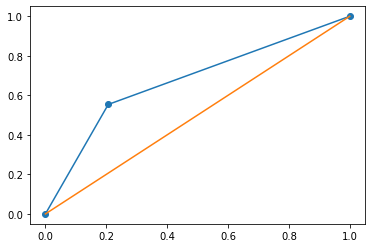

In [95]:
pred_train=Dt.predict(X_train)
pred_test=Dt.predict(X_test)
proba=Dt.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 2.

              precision    recall  f1-score   support

           0       0.84      0.76      0.80     16987
           1       0.59      0.70      0.64      8286

    accuracy                           0.74     25273
   macro avg       0.71      0.73      0.72     25273
weighted avg       0.76      0.74      0.75     25273

[[12916  4071]
 [ 2465  5821]]


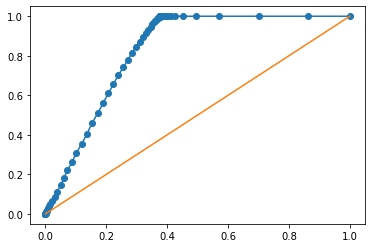

In [96]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

pred_train=RF.predict(X_train)
pred_test=RF.predict(X_test)
proba=RF.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 3.

              precision    recall  f1-score   support

           0       0.93      0.05      0.09     16987
           1       0.34      0.99      0.50      8286

    accuracy                           0.36     25273
   macro avg       0.63      0.52      0.30     25273
weighted avg       0.74      0.36      0.23     25273

[[  830 16157]
 [   63  8223]]


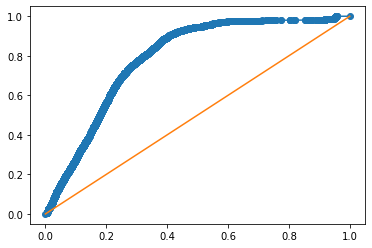

In [97]:
Nb=GaussianNB()
Nb.fit(X_train,y_train)

pred_train=Nb.predict(X_train)
pred_test=Nb.predict(X_test)
proba=Nb.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 4.

In [98]:
from xgboost import XGBClassifier

[11:40:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.86      0.73      0.79     16987
           1       0.58      0.76      0.66      8286

    accuracy                           0.74     25273
   macro avg       0.72      0.75      0.73     25273
weighted avg       0.77      0.74      0.75     25273

[[12421  4566]
 [ 1955  6331]]


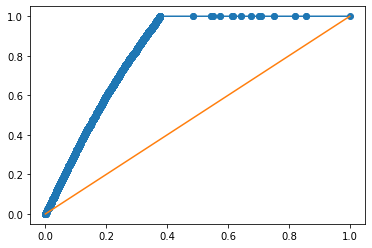

In [99]:
XGB=XGBClassifier(use_label_encoder=False)
XGB.fit(X_train,y_train)

pred_train=XGB.predict(X_train)
pred_test=XGB.predict(X_test)
proba=XGB.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

In [100]:
XGBClassifier?

[11:40:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.90      0.71      0.79     16987
           1       0.59      0.83      0.69      8286

    accuracy                           0.75     25273
   macro avg       0.74      0.77      0.74     25273
weighted avg       0.79      0.75      0.76     25273

[[12130  4857]
 [ 1412  6874]]


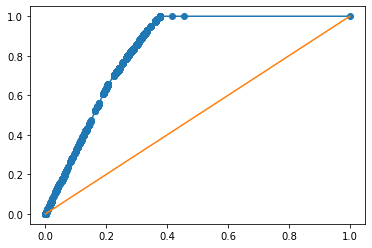

In [101]:
XGB=XGBClassifier(use_label_encoder=False,n_estimators=100,learning_rate=.01)
XGB.fit(X_train,y_train)

pred_train=XGB.predict(X_train)
pred_test=XGB.predict(X_test)
proba=XGB.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

### ------------------------------------------------------------------------------------------------------

In [102]:
sub=pd.DataFrame(index=test['OrderId'])

In [103]:
sub['Delivery_Status']=XGB.predict(test_X)
sub['Delivery_Status'].value_counts()

0    28793
1    25363
Name: Delivery_Status, dtype: int64

In [104]:
sub.to_csv('Submission.csv')